# Обучение без учителя

**Автор**: Винник Екатерина Петровна, 22.М04


## Задача

- [ ] Найти данные с количеством признаков хотя бы 50, на которых можно решить задачу кластеризации.
- [ ] Выполнить разведочный анализ (**EDA**). При необходимости выполнить полезные преобразования данных.
- [ ] Самостоятельно реализуйте один из алгоритмов кластеризации, например **K-means**.
- [ ] Обучите модели кластеризации, используя свою реализацию, а также хотя бы две реализации из **sklearn** (**KMeans**, **Affinity Propogation**, **DBSCAN** и тд).
- [ ] При обучении использовать **подбор гиперпараметров**.
- [ ] Сравнить качество моделей: замерить скорость обучения, вычислить различные метрики качества.
- [ ] * (**+3 балла**) Также снизить размерность данных с помощью метода главных компонент **PCA** и и понять качество дальнейшей кластеризации всеми использованными реализациями при различном количестве главных компонент.
- [ ] * (**+2 балла**) Визуализировать данные снижением размерности до 2 или 3 с помощью **PCA** и **t-SNE**. В случае проблем с производительностью **t-SNE**, можно сначала до какой то степени снизить размерность с помощью **PCA**, а затем запустить **t-SNE**.

## EDA

Загрузим датасет.

In [1]:
# https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения
df = pd.read_excel('./Data_Cortex_Nuclear.xls')
df.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


Classes:
- c-CS-s: control mice, stimulated to learn, injected with saline (9 mice)
- c-CS-m: control mice, stimulated to learn, injected with memantine (10 mice)
- c-SC-s: control mice, not stimulated to learn, injected with saline (9 mice)
- c-SC-m: control mice, not stimulated to learn, injected with memantine (10 mice)

- t-CS-s: trisomy mice, stimulated to learn, injected with saline (7 mice)
- t-CS-m: trisomy mice, stimulated to learn, injected with memantine (9 mice)
- t-SC-s: trisomy mice, not stimulated to learn, injected with saline (9 mice)
- t-SC-m: trisomy mice, not stimulated to learn, injected with memantine (9 mice)

Attribute Information:

- 1 Mouse ID
- 2..78 Values of expression levels of 77 proteins; the names of proteins are followed by â€œ_nâ€ indicating that they were measured in the nuclear fraction. For example: DYRK1A_n
- 79 Genotype: control (c) or trisomy (t)
- 80 Treatment type: memantine (m) or saline (s)
- 81 Behavior: context-shock (CS) or shock-context (SC)
- 82 Class: c-CS-s, c-CS-m, c-SC-s, c-SC-m, t-CS-s, t-CS-m, t-SC-s, t-SC-m

In [2]:
df.shape

(1080, 82)

In [3]:
df.columns

Index(['MouseID', 'DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N',
       'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N',
       'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N',
       'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N',
       'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N',
       'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N',
       'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N',
       'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N',
       'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N',
       'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N',
       'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N',
       'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N',
       'CaNA_N', 'Genotype', 'Treatment', 'Behavior', 'class'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N       

### EDA and feature engineering

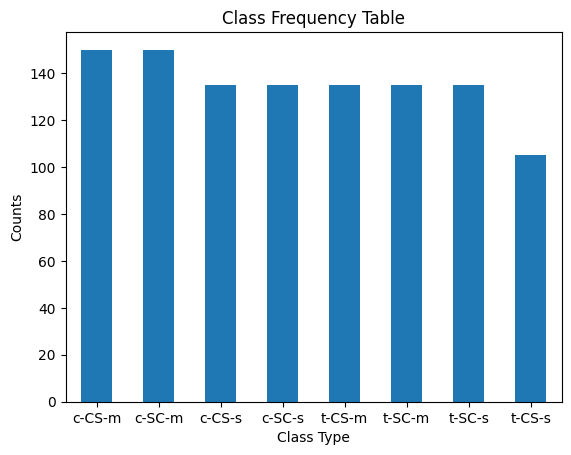

In [5]:
# Plot frequency of unique values for 'class'
df['class'].value_counts().plot(kind='bar')
plt.title('Class Frequency Table')
plt.xlabel('Class Type')
plt.xticks(rotation='horizontal')
plt.ylabel('Counts')
plt.show()


In [6]:
df.shape

(1080, 82)

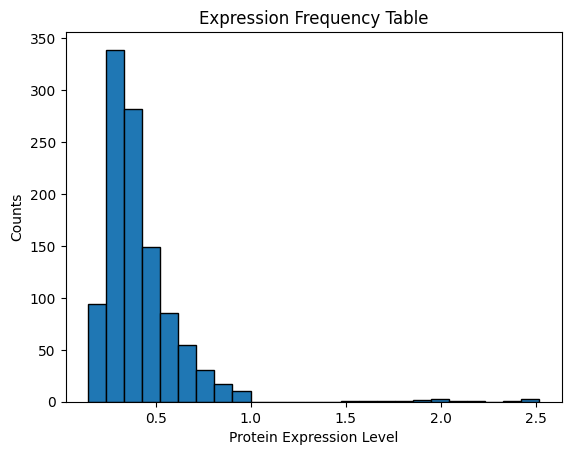

In [7]:
# Histogram of protein expression level - DYRK1A
protein = df['DYRK1A_N'].dropna()
plt.hist(protein, bins=25, edgecolor='black')
plt.title('Expression Frequency Table')
plt.xlabel('Protein Expression Level')
plt.ylabel('Counts')
plt.show()

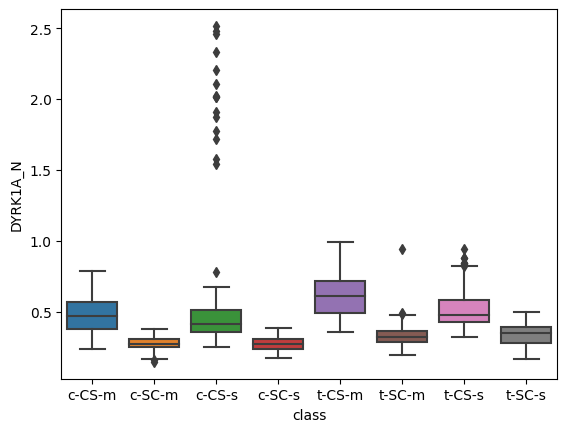

In [8]:
protein = df[['DYRK1A_N', 'class']].dropna()
sns.boxplot(x='class', y='DYRK1A_N', data=protein)
plt.show()

In [9]:
df['pCFOS_N'].describe()

count    1005.000000
mean        0.131053
std         0.023863
min         0.085419
25%         0.113506
50%         0.126523
75%         0.143652
max         0.256529
Name: pCFOS_N, dtype: float64

In [10]:
df['ELK_N'].describe()

count    1062.000000
mean        1.173400
std         0.335786
min         0.497695
25%         0.944435
50%         1.096186
75%         1.323581
max         2.802948
Name: ELK_N, dtype: float64

In [11]:
df['Bcatenin_N'].describe()

count    1062.000000
mean        2.146550
std         0.435742
min         1.134886
25%         1.826707
50%         2.114769
75%         2.423875
max         3.680552
Name: Bcatenin_N, dtype: float64

#### Data cleaning

In [12]:
df.isnull().sum().sort_values(ascending=False)

BCL2_N       285
H3MeK4_N     270
BAD_N        213
EGR1_N       210
H3AcK18_N    180
            ... 
nNOS_N         0
Tau_N          0
GFAP_N         0
GluR3_N        0
class          0
Length: 82, dtype: int64

In [13]:
df = df.drop(columns=['BCL2_N', 'H3MeK4_N', 'BAD_N', 'EGR1_N', 'H3AcK18_N'])
df = df.fillna(df.mean())

In [14]:
df.shape

(1080, 77)

#### Feature engineering

In [15]:
df.describe(include='object')

,MouseID,Genotype,Treatment,Behavior,class
count,1080,1080,1080,1080,1080
unique,1080,2,2,2,8
top,309_1,Control,Memantine,S/C,c-CS-m
freq,1,570,570,555,150


In [16]:
for col in df.select_dtypes("object"):
    print(f'{col :-<50} {df[col].unique()}')

MouseID------------------------------------------- ['309_1' '309_2' '309_3' ... 'J3295_13' 'J3295_14' 'J3295_15']
Genotype------------------------------------------ ['Control' 'Ts65Dn']
Treatment----------------------------------------- ['Memantine' 'Saline']
Behavior------------------------------------------ ['C/S' 'S/C']
class--------------------------------------------- ['c-CS-m' 'c-SC-m' 'c-CS-s' 'c-SC-s' 't-CS-m' 't-SC-m' 't-CS-s' 't-SC-s']


Control    570
Ts65Dn     510
Name: Genotype, dtype: int64


Text(0.5, 1.0, 'Distribution of Genotype')

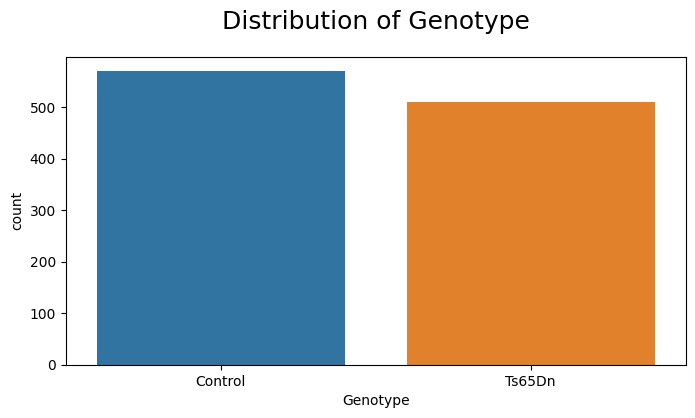

In [17]:
print(df['Genotype'].value_counts())

plt.figure(figsize=(8, 4)) 
ax = sns.countplot(x='Genotype',data=df)
ax.set_title('Distribution of Genotype', fontsize=18, pad=20)

Memantine    570
Saline       510
Name: Treatment, dtype: int64


Text(0.5, 1.0, 'Distribution of Treatment')

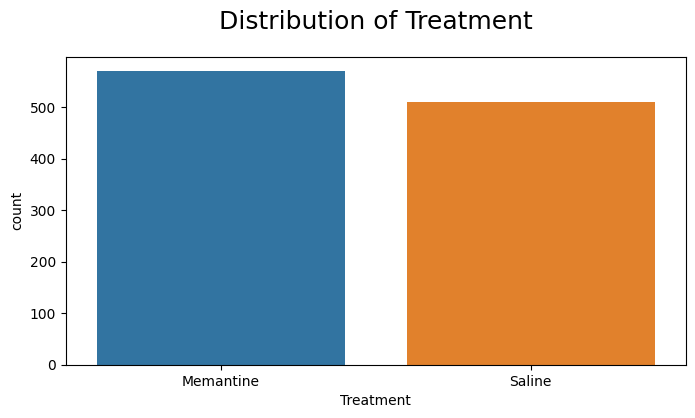

In [18]:
print(df['Treatment'].value_counts())

plt.figure(figsize=(8, 4)) 
ax = sns.countplot(x='Treatment',data=df)
ax.set_title('Distribution of Treatment', fontsize=18, pad=20)

S/C    555
C/S    525
Name: Behavior, dtype: int64


Text(0.5, 1.0, 'Distribution of Behavior')

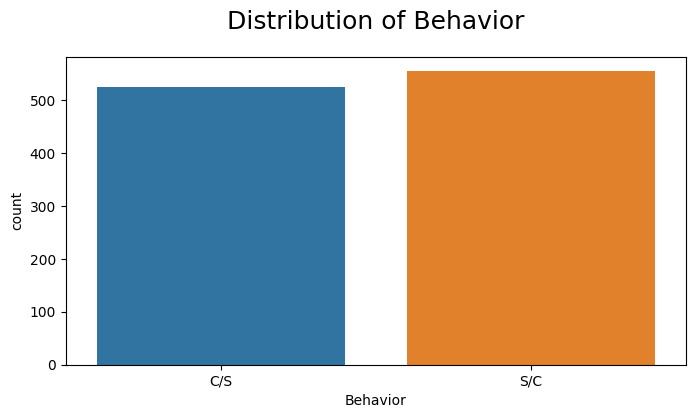

In [19]:
print(df['Behavior'].value_counts())

plt.figure(figsize=(8, 4)) 
ax = sns.countplot(x='Behavior',data=df)
ax.set_title('Distribution of Behavior', fontsize=18, pad=20)

In [20]:
X = df.drop('class',axis=1)
y1 = df[['class']]

In [21]:
classes = {"class":     {"c-CS-m": 0, "c-SC-m": 1, 'c-CS-s': 2, 'c-SC-s': 3, 't-CS-m':4, 't-SC-m':5,
                            't-SC-s':6, 't-CS-s':7}}
y = y1.replace(classes)
y = pd.DataFrame(y)
y.reset_index()
y['class'].value_counts()

0    150
1    150
2    135
3    135
4    135
5    135
6    135
7    105
Name: class, dtype: int64

In [22]:
X = pd.get_dummies(data=X,columns=["Treatment","Behavior", "Genotype"])

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 79 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MouseID              1080 non-null   object 
 1   DYRK1A_N             1080 non-null   float64
 2   ITSN1_N              1080 non-null   float64
 3   BDNF_N               1080 non-null   float64
 4   NR1_N                1080 non-null   float64
 5   NR2A_N               1080 non-null   float64
 6   pAKT_N               1080 non-null   float64
 7   pBRAF_N              1080 non-null   float64
 8   pCAMKII_N            1080 non-null   float64
 9   pCREB_N              1080 non-null   float64
 10  pELK_N               1080 non-null   float64
 11  pERK_N               1080 non-null   float64
 12  pJNK_N               1080 non-null   float64
 13  PKCA_N               1080 non-null   float64
 14  pMEK_N               1080 non-null   float64
 15  pNR1_N               1080 non-null   f

In [24]:
X = X.drop(['MouseID'], axis=1)

### Creating models

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,0.151122,0.212885,0.824638,0.612119,0.630482,0.327006,0.448666,0.168257,0.617322,0.232553,...,0.426816,0.133930,0.336299,0.705738,1.0,0.0,1.0,0.0,1.0,0.0
1,0.155750,0.188226,0.776455,0.601070,0.585247,0.311887,0.429899,0.154925,0.590173,0.205362,...,0.429952,0.110434,0.365208,0.749771,1.0,0.0,1.0,0.0,1.0,0.0
2,0.153459,0.205696,0.793572,0.558911,0.575910,0.306369,0.441381,0.153485,0.607102,0.199194,...,0.448652,0.121560,0.353621,0.868229,1.0,0.0,1.0,0.0,1.0,0.0
3,0.125169,0.157688,0.637326,0.468152,0.480646,0.335530,0.444307,0.132074,0.486945,0.205135,...,0.392700,0.151031,0.265619,0.721879,1.0,0.0,1.0,0.0,1.0,0.0
4,0.122146,0.157838,0.637787,0.426467,0.441977,0.314976,0.433100,0.129086,0.410194,0.189152,...,0.410187,0.147711,0.350381,0.812053,1.0,0.0,1.0,0.0,1.0,0.0


In [26]:
df_scaled.shape

(1080, 78)

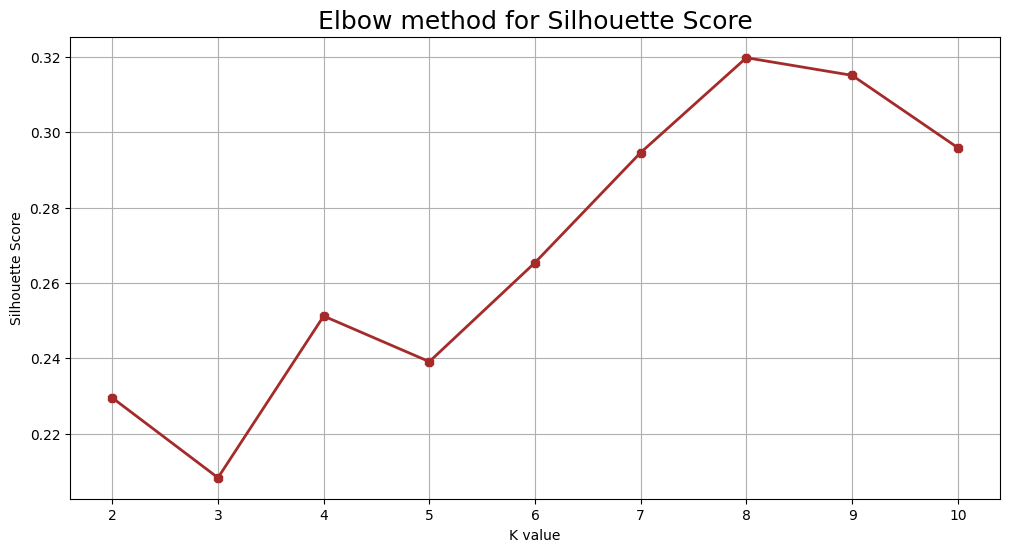

In [27]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

sil = []

for i in [2,3,4,5,6,7,8,9,10]:
    km = KMeans(n_clusters=i, init = 'k-means++', n_init=10, max_iter=100, random_state=42)
    km.fit(df_scaled)
    sil.append(silhouette_score(df_scaled, km.predict(df_scaled)))
    
plt.figure(figsize=(12,6))
plt.grid()
plt.plot([2,3,4,5,6,7,8,9,10], sil, linewidth=2, color='brown', marker = '8')
plt.xlabel('K value')
plt.ylabel('Silhouette Score')
plt.title('Elbow method for Silhouette Score', fontsize=18)
plt.show()

Apply K-means with 8 clusters

In [28]:
kmeans_1 = KMeans(n_clusters=8, random_state=42)
kmeans_1 = kmeans_1.fit(df_scaled)
print('The clusters are:  ', kmeans_1.labels_)

The clusters are:   [2 2 2 ... 7 7 7]


In [30]:
km_label_1 = kmeans_1.predict(df_scaled)

silh_score_1 = silhouette_score(df_scaled, km_label_1)
print(f'Silhouette Score(n = 2): {silhouette_score(df_scaled, km_label_1)}')

Silhouette Score(n = 2): 0.31981543590845335


Результаты не очень хороши.

#### PCA

In [31]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

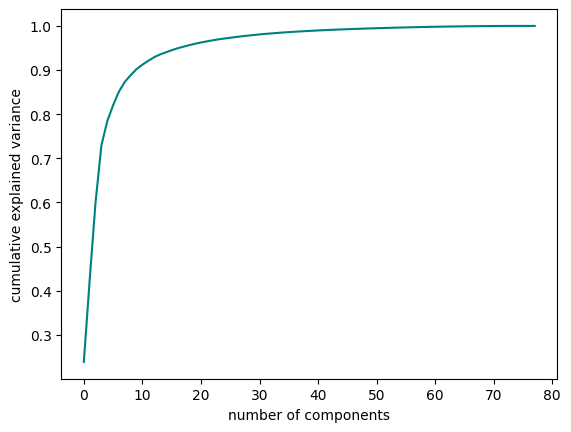

In [32]:
pca = PCA().fit(df_scaled) 
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='teal') 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance'); 

In [33]:
pca = PCA(0.80).fit(df_scaled)
pca.n_components_ 

6

In [34]:
pca = PCA(0.39).fit(df_scaled)
pca.n_components_ 

2

In [35]:
pca = PCA(n_components=6, random_state=42)
df_pca_1 = pca.fit(df_scaled).transform(df_scaled)

kmeans_2 = KMeans(n_clusters=8, random_state=42)
kmeans_2 = kmeans_2.fit(df_pca_1)
print('The clusters are:  ', kmeans_2.labels_)

The clusters are:   [2 2 2 ... 6 6 6]


In [36]:
km_label_2 = kmeans_2.predict(df_pca_1)

silh_score_2 = silhouette_score(df_pca_1, km_label_2)
print(f'Silhouette Score(n = 2): {silhouette_score(df_pca_1, km_label_2)}')

Silhouette Score(n = 2): 0.4479773215401528


In [38]:
pca = PCA(n_components=2, random_state=42)
df_pca = pca.fit(df_scaled).transform(df_scaled)

kmeans_3 = KMeans(n_clusters=8, random_state=42)
kmeans_3 = kmeans_2.fit(df_pca)
print('The clusters are:  ', kmeans_3.labels_)

The clusters are:   [4 4 4 ... 3 3 3]


In [39]:
km_label_3 = kmeans_2.predict(df_pca)
silh_score_3 = silhouette_score(df_pca, km_label_3)
print(f'Silhouette Score(n = 2): {silhouette_score(df_pca, km_label_3)}')

Silhouette Score(n = 2): 0.7682209605821674


### Visualize clusters

In [40]:
df_pca_2 = pd.DataFrame(df_pca, columns =['Component 1', 'Component 2'])
df_pca_2.head(2)

,Component 1,Component 2
0,-0.804618,-1.007160
1,-0.822809,-1.002333


In [41]:
columns = ['km_label_3']
km_label_3 = pd.DataFrame(data=km_label_3, columns=columns)
km_label_3.head()
print(km_label_3.value_counts())

km_label_3
4             150
5             150
1             135
2             135
3             135
6             135
7             135
0             105
dtype: int64


In [42]:
df_pca_2 = pd.concat([df_pca_2, km_label_3,y], axis=1)
df_pca_2.head()

,Component 1,Component 2,km_label_3,class
0,-0.804618,-1.007160,4,0
1,-0.822809,-1.002333,4,0
2,-0.846543,-0.996492,4,0
3,-0.811094,-0.998073,4,0
4,-0.835360,-0.997919,4,0


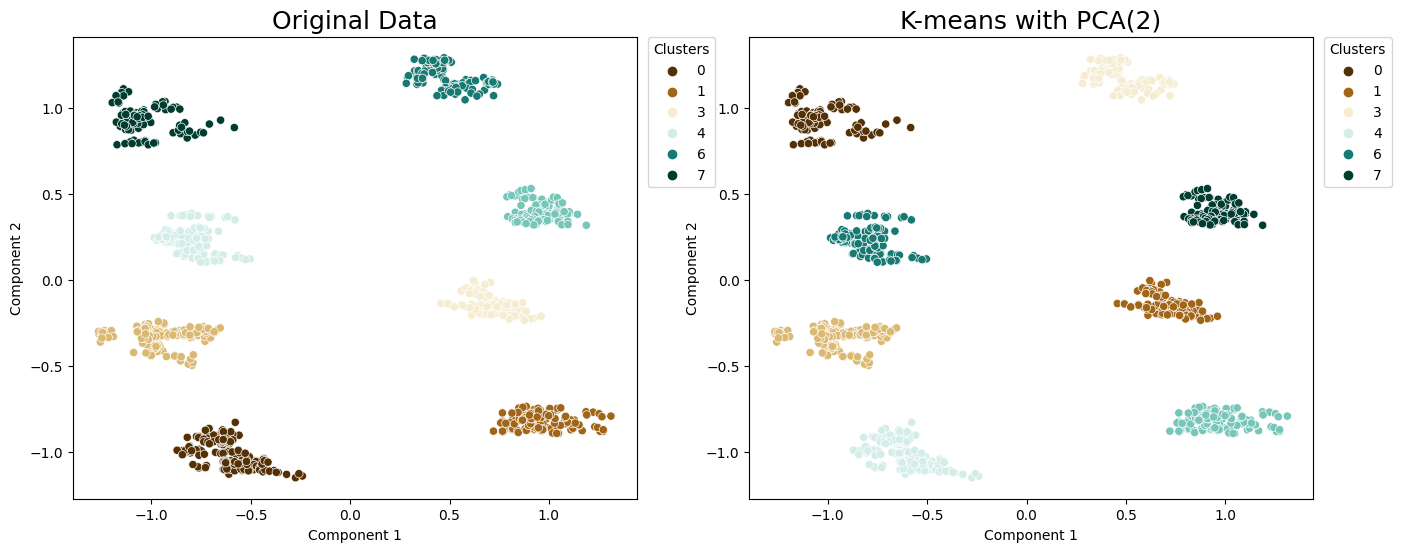

In [43]:
plt.figure(figsize=(16, 6)) 
plt.subplot(1,2,1)

sns.scatterplot(x = 'Component 1', y = 'Component 2', data = df_pca_2, hue = 'class', palette='BrBG')
plt.title('Original Data', fontsize=18)
plt.legend(title='Clusters', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize='medium')

plt.subplot(1,2,2)

sns.scatterplot(x = 'Component 1', y = 'Component 2', data = df_pca_2, hue = 'km_label_3', palette='BrBG')
plt.title('K-means with PCA(2)', fontsize=18)
plt.legend(title='Clusters', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize='medium')

plt.show()

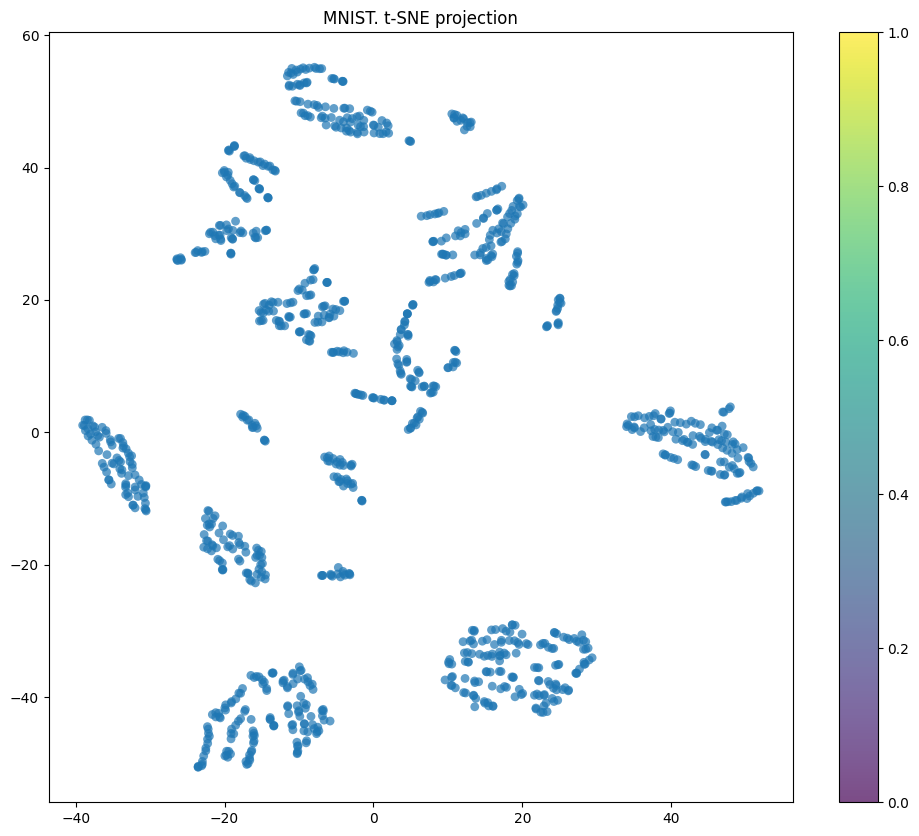

In [49]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=42)

X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12, 10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1],edgecolor="none", alpha=0.7, s=40, cmap=plt.cm.get_cmap("nipy_spectral", 10),)
plt.colorbar()
plt.title("MNIST. t-SNE projection");